<a href="https://colab.research.google.com/github/SparshKhandelwal103/Neural-Style-Transfer/blob/main/neural_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

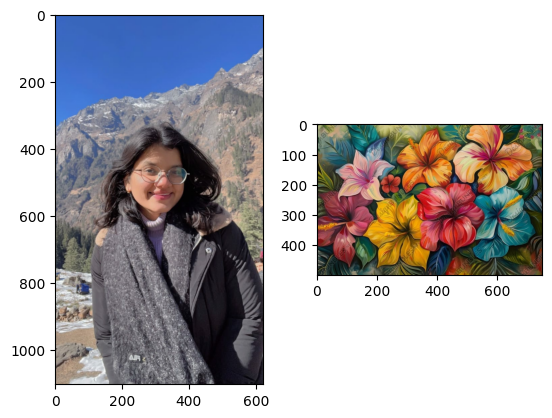

In [52]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import time
from google.colab import files
uploaded = files.upload()


model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

def load_img(img_path, max_dim=512):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim
    img = img[tf.newaxis, :]
    return img

content_image = load_img('main2.jpg')
style_image = load_img('content2.jpg')

plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(content_image))

plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(style_image))
plt.show()


In [53]:
content_image.shape

TensorShape([1, 1104, 621, 3])

In [54]:
import os

def load_img_safe(img_path, max_dim=512):
    if not os.path.exists(img_path):
        raise FileNotFoundError(f"Image not found: {img_path}")



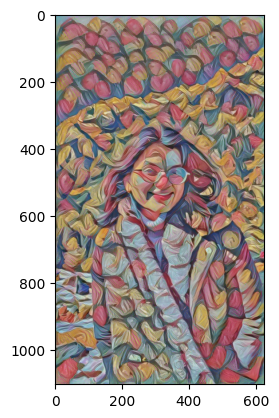

In [55]:
stylized_image1 = model(tf.constant(content_image), tf.constant(style_image))[0]
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [57]:
tf.keras.utils.save_img("stylized_image1.jpg", stylized_image.numpy().squeeze())
from google.colab import files
files.download("stylized_image1.jpg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>